## 차원 축소를 하는 이유

- 사람이 보기에 시작적으로 용이함
- 변수(피처)의 조합을 통해 새로운 변수 발견
- 차원의 저주 문제가 발생할 수 있기 때문에 조심해야 함

### Feature Selection

- 가지고 있는 변수들 중에 의미 있는 변수만 선택
- 주로 상관분석을 통해 변수를 선택

### Feature Extraction

- 변수 추출: 변수를 조합하여 A, B라는 변수를 생성
- 주로 사용되는 방법은 주성분 분석(PCA)
- PCA 실행 결과 나온 Var를 그래프로 그린 뒤 급격하게 떨어지는 지점에서 PC개수 선택

## PCA

1. 분산이 최대인 축 찾기
2. 찾은 축과 직교하면서 분산이 최대인 두 번째 축 찾기
3. 첫 번째 축과 두 번째 축에 직교하고 분산을 보존하는 세 번째 축 찾기

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = './data/boston.csv'

raw = pd.read_csv(file)
raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 데이터 설명

- crim:범죄율
- zn: 25,000 평방피트를 초과 거주지역 비율
...

데이터 설명: https://wikidocs.net/49966

### Feature Selection
`상관계수`와 `공분산`을 바탕으로 피처를 선택한다.

### 가설1 - 범죄율이 높은 곳의 집 값은 낮을까?

In [5]:
#상관계수와 공분산은 범주형변수가 없어야 합니다.

#chas는 0과 1의 값을 가짐
del raw['chas']

In [6]:
raw.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


실제 집 값과 범죄율의 상관관계를 알아봅니다.

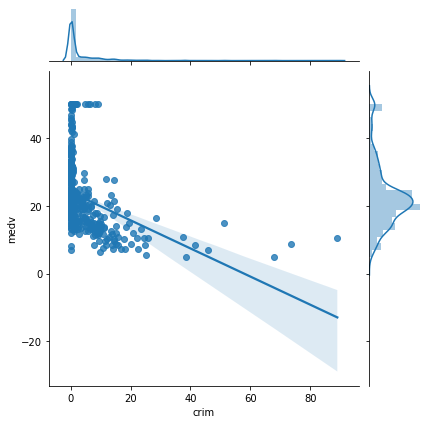

In [8]:
sns.jointplot(data= raw, x='crim',y='medv',kind='regg')

어느 정도 관계가 있음을 알 수 있습니다. 더 정확히 알기 위해 공분산을 확인합니다.<br>
`x.cov()`
- 공분산을 확인하기 위한 함수
- x, y에 같은 시리즈형의 데이터를 대입한다.
- df.cov()처럼 데이터프레임을 x에 넣고 y 자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산한다.

In [9]:
raw['crim'].cov(raw['medv'])

-30.718507964458176

`x.corr(v)`
- 상관계수를 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.corr()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 상관계수를 계산한다.

In [10]:
raw['crim'].corr(raw['medv'])

-0.3883046085868114

강한 음의 상관관계를 가지고 있음을 알 수 있습니다.

### 가설2 - 방의 개수가 많은 곳이 집 값이 비쌀까?

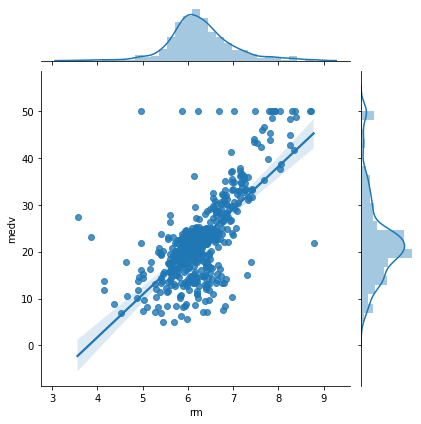

In [12]:
sns.jointplot(data=raw, x='rm', y='medv', kind= 'regg')

In [14]:
raw['rm'].cov(raw['medv'])

4.493445879544474

In [16]:
raw['rm'].corr(raw['medv'])

0.6953599470715387

방의 갯수와 집값은 강한 양의 상관성을 가지고 있다.

`sns.headmap(df, cmap, annot, fmt)`
- cmap: 전체적인 색을 지정
- annot: 숫자를 표현해줄 것인지 여부
- fmt: 유효숫자 설정


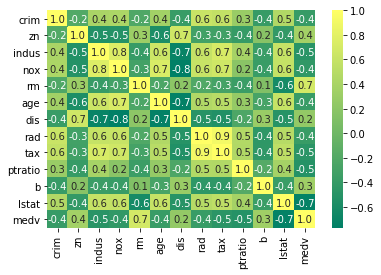

In [20]:
sns.heatmap(raw.corr(), cmap='summer', annot=True, fmt='.1f')

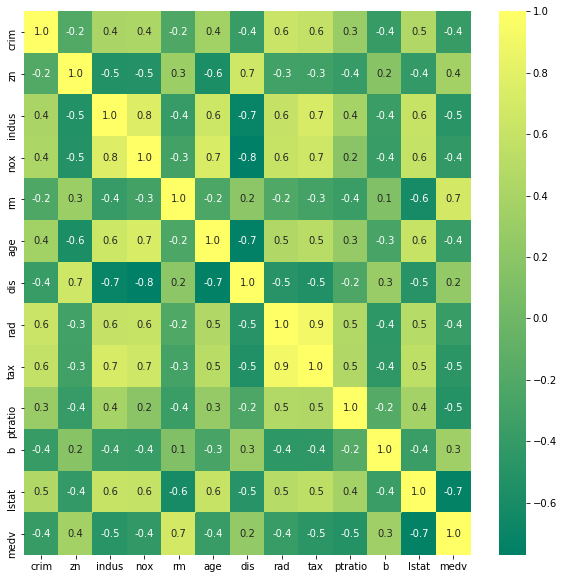

In [22]:
plt.figure(figsize= (10,10))
sns.heatmap(raw.corr(), cmap='summer', annot=True, fmt='.1f')

### Feature Extraction

PCA를 이용해 새로운 변수를 만들어본다,

In [28]:
#변수들의 상관계수를 전부 확인하고 몇개의 변수를 몇개로 줄일 것인지 확인해본다.
corr_bar = []

for col in raw.columns:
    print(f"{col}과 집값의 상관관계: ",round(raw[col].corr(raw['medv']),3))
    corr_bar.append(abs(raw[col].corr(raw['medv'])))
    

crim과 집값의 상관관계:  -0.388
zn과 집값의 상관관계:  0.36
indus과 집값의 상관관계:  -0.484
nox과 집값의 상관관계:  -0.427
rm과 집값의 상관관계:  0.695
age과 집값의 상관관계:  -0.377
dis과 집값의 상관관계:  0.25
rad과 집값의 상관관계:  -0.382
tax과 집값의 상관관계:  -0.469
ptratio과 집값의 상관관계:  -0.508
b과 집값의 상관관계:  0.333
lstat과 집값의 상관관계:  -0.738
medv과 집값의 상관관계:  1.0


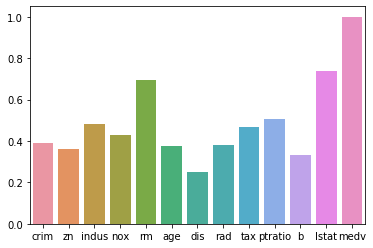

In [29]:
sns.barplot(raw.columns, corr_bar)

수치형데이터 중에 상관계수가 낮은 두 개의 변수를 선택합니다.

In [30]:
data = raw[['dis','b']]

In [31]:
#PCA 라이브러리
from sklearn.decomposition import PCA

`PCA(n_components)`
- n_components: 몇가지 변수를 만들지 개수를 정한다.
- 객체를 생성하는 개념

`PCA.fit(x)`
- x의 데이터를 학습시킴

`PCA.components_`
- 앞서 학습한 내용을 바탕으로 만들어진 변수속에 담긴 변수의 분산 정보

`PCA.explained_variance_ratio_`
- 새로운 변수가 설명하는 분산의 비율

`PCA.transform`
- 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환

In [32]:
pca = PCA(n_components=1)

In [34]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
data.head()

,dis,b
0,4.0900,396.90
1,4.9671,396.90
2,4.9671,392.83
3,6.0622,394.63
4,6.0622,396.90


In [36]:
pca.components_

array([[-0.00672682, -0.99997737]])

b의 값이 너무 크기 때문에 dis의 비율이 너무 작게 반영되고 있습니다.

In [38]:
#새로운 변수 PC1이 설명하는 분산의 비율
pca.explained_variance_ratio_

array([0.9995135])

In [39]:
raw['pc1'] = pca.transform(data)

In [40]:
raw

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-40.240309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,-35.306314
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,-40.214917
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,-40.214110
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,-36.765677


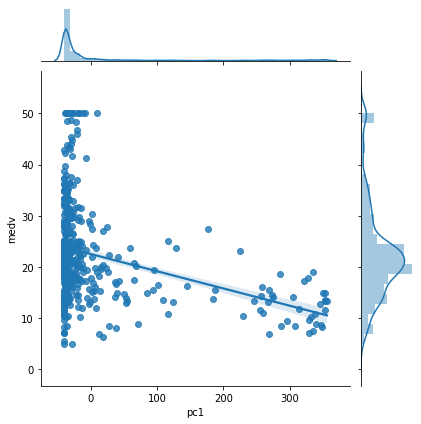

In [41]:
sns.jointplot(data=raw, x='pc1',y='medv',kind='regg')

In [43]:
raw['pc1'].corr(raw['medv'])

-0.33348451067418966

이전과 크게 달라진 점을 발견할 수 없습니다.

### 정규화

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler_x = StandardScaler()
scaler_x.fit(data)
scaler_data = scaler_x.transform(data)
scaler_data

array([[ 0.1402136 ,  0.44105193],
       [ 0.55715988,  0.44105193],
       [ 0.55715988,  0.39642699],
       ...,
       [-0.77368357,  0.44105193],
       [-0.66843684,  0.4032249 ],
       [-0.61324648,  0.44105193]])

In [46]:
pca = PCA(n_components=1)
pca.fit(scaler_data)
pca.components_

array([[-0.70710678, -0.70710678]])

In [47]:
#새로운 변수 PC1이 설명하는 분산의 비율
pca.explained_variance_ratio_

array([0.64575584])

In [51]:
raw['pc2'] = pca.transform(scaler_data)
raw

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1,pc2
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-40.227042,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-40.232942,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-36.163035,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-37.970360,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-40.240309,-1.073946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,-35.306314,0.168701
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,-40.214917,0.194870
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,-40.214110,0.235206
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,-36.765677,0.187533


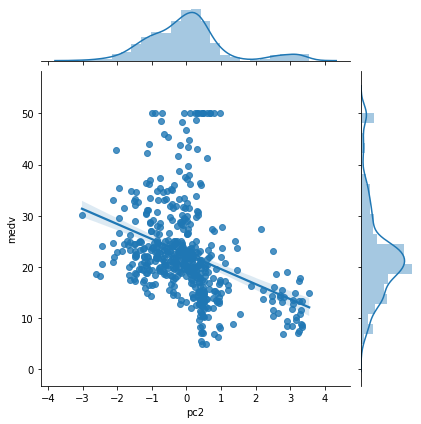

In [52]:
sns.jointplot(data=raw, x='pc2',y='medv',kind='regg')

In [54]:
raw['pc2'].corr(raw['medv'])

-0.36298985100090186

이전에 비해서 증가한 것을 알 수 있습니다.